In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
movies_df = pd.read_csv("data_movie.csv")
movies_df

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,...,main_actor_2,main_actor_3,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,genre_3,genre_4
0,m0001,Pretty Woman,1990,1990-03-22,A man in a legal but hurtful business needs an...,R,119,Garry Marshall,J.F. Lawton,Arnon Milchan,...,Julia Roberts,Jason Alexander,Laura San Giacomo,14000000.0,178406268.0,4.634063e+08,Comedy,Romance,NaN,NaN
1,m0002,The Godfather: Part III,1990,1990-12-24,In the midst of trying to legitimize his busin...,R,162,Francis Ford Coppola,Mario Puzo,Francis Ford Coppola,...,Diane Keaton,Andy Garcia,Talia Shire,54000000.0,66666062.0,1.367661e+08,Crime,Drama,NaN,NaN
2,m0003,Thelma & Louise,1991,1991-05-23,"Two best friends set out on an adventure, but ...",R,130,Ridley Scott,Callie Khouri,Mimi Polk Gitlin,...,Geena Davis,Harvey Keitel,Michael Madsen,16500000.0,45360915.0,4.543480e+07,Adventure,Crime,Drama,NaN
3,m0004,Terminator 2: Judgment Day,1991,1991-07-02,"A cyborg, identical to the one who failed to k...",R,137,James Cameron,James Cameron,James Cameron,...,Linda Hamilton,Edward Furlong,Robert Patrick,102000000.0,205881154.0,5.208848e+08,Action,Sci-Fi,NaN,NaN
4,m0005,Boyz n the Hood,1991,1991-07-11,Follows the lives of three young males living ...,R,112,John Singleton,John Singleton,Steve Nicolaides,...,Laurence Fishburne,Hudhail Al-Amir,Lloyd Avery II,6500000.0,57504069.0,5.752907e+07,Crime,Drama,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,m1140,Ready Player One,2018,2018-03-27,When the creator of a virtual reality called t...,PG-13,140,Steven Spielberg,Zak Penn,Donald De Line,...,Olivia Cooke,Ben Mendelsohn,Lena Waithe,175000000.0,137690172.0,5.828902e+08,Action,Adventure,Sci-Fi,NaN
1140,m1141,A Quiet Place,2018,2018-04-03,"In a post-apocalyptic world, a family is force...",PG-13,90,John Krasinski,Bryan Woods,Michael Bay,...,John Krasinski,Millicent Simmonds,Noah Jupe,17000000.0,188024361.0,3.409394e+08,Drama,Horror,Sci-Fi,NaN
1141,m1142,Deadpool 2,2018,2018-05-15,Foul-mouthed mutant mercenary Wade Wilson a.k....,R,119,David Leitch,Rhett Reese,Simon Kinberg,...,Josh Brolin,Morena Baccarin,Julian Dennison,110000000.0,324591735.0,7.857942e+08,Action,Adventure,Comedy,Sci-Fi
1142,m1143,Spider-Man: Into the Spider-Verse,2018,2018-12-11,Teen Miles Morales becomes Spider-Man of his r...,PG,117,Bob Persichetti,Phil Lord,Avi Arad,...,Jake Johnson,Hailee Steinfeld,Mahershala Ali,90000000.0,190241310.0,3.755408e+08,Action,Adventure,Animation,Family


# Check data types

In [4]:
movies_df.dtypes

movie_id         object
title            object
year              int64
release          object
trivia           object
mpaa             object
run_time          int64
director         object
writer           object
producer         object
composer         object
main_actor_1     object
main_actor_2     object
main_actor_3     object
main_actor_4     object
budget          float64
domestic        float64
worldwide       float64
genre_1          object
genre_2          object
genre_3          object
genre_4          object
dtype: object

In [5]:
movies_df["release"] = pd.to_datetime(movies_df["release"]) # change to datetime format
movies_df.dtypes 

movie_id                object
title                   object
year                     int64
release         datetime64[ns]
trivia                  object
mpaa                    object
run_time                 int64
director                object
writer                  object
producer                object
composer                object
main_actor_1            object
main_actor_2            object
main_actor_3            object
main_actor_4            object
budget                 float64
domestic               float64
worldwide              float64
genre_1                 object
genre_2                 object
genre_3                 object
genre_4                 object
dtype: object

# Check for missing values

In [6]:
movies_df.isnull().sum()

movie_id          0
title             0
year              0
release           0
trivia            0
mpaa              0
run_time          0
director          0
writer            0
producer          0
composer          0
main_actor_1      0
main_actor_2      0
main_actor_3      0
main_actor_4      0
budget            0
domestic          0
worldwide         0
genre_1           0
genre_2          72
genre_3         304
genre_4         725
dtype: int64

# Check for outliers using IQR

In [7]:
from pandas.api.types import is_numeric_dtype
for col in movies_df.columns:
    if is_numeric_dtype(movies_df[col]) == True:
        series = movies_df[col]
        q1 = series.describe()["25%"]
        q3 = series.describe()["75%"]
        iqr = q3 - q1
        outliers = 0
        for x in series:
            if x > (q3 + (1.5 * iqr)) or x < (q1 - (1.5*iqr)):
                outliers += 1
        print(series.name + " has " + str(outliers) + " outliers")


year has 0 outliers
run_time has 22 outliers
budget has 45 outliers
domestic has 76 outliers
worldwide has 95 outliers


# Viz

In [8]:
from pandas.api.types import is_numeric_dtype
def visualize_srs(series):
    if is_numeric_dtype(series) == True:
        fig, axes = plt.subplots(nrows = 3, ncols =1)
        series.plot(kind = "box", ax = axes[0], figsize = (16,16))
        series.plot(kind = "kde", ax = axes[1], figsize = (16,16))
        series.plot(kind = "hist", ax = axes[2], figsize = (16,16))
    else:
        return

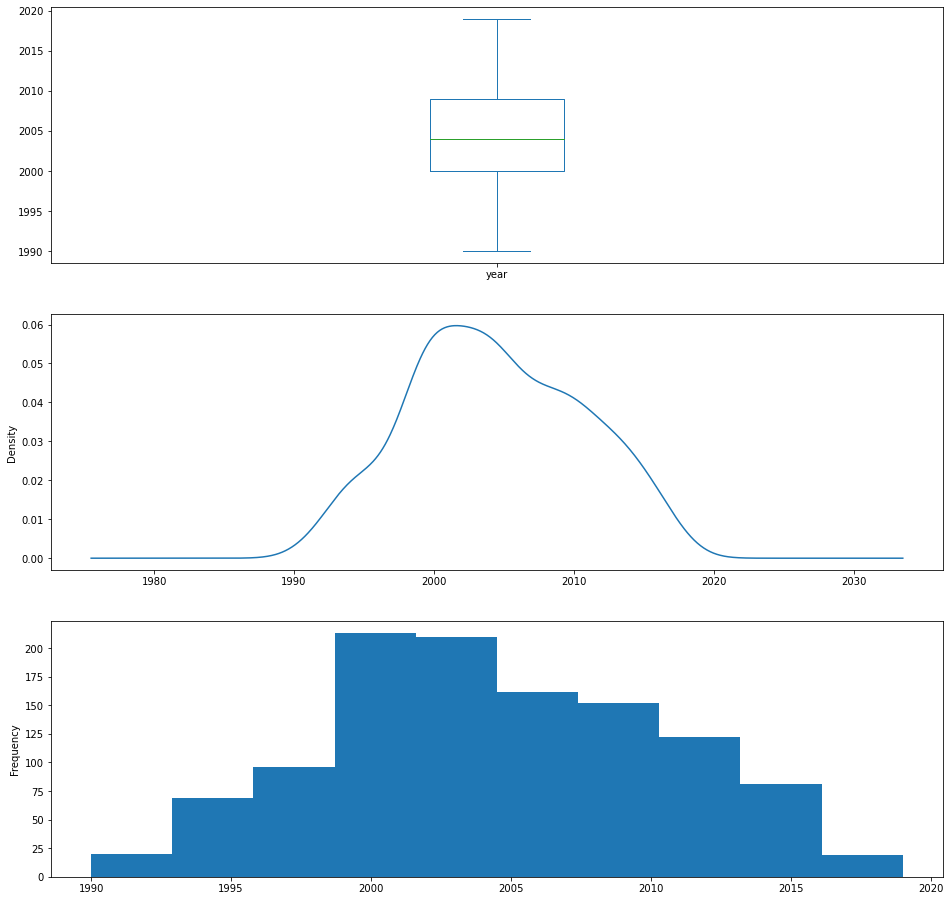

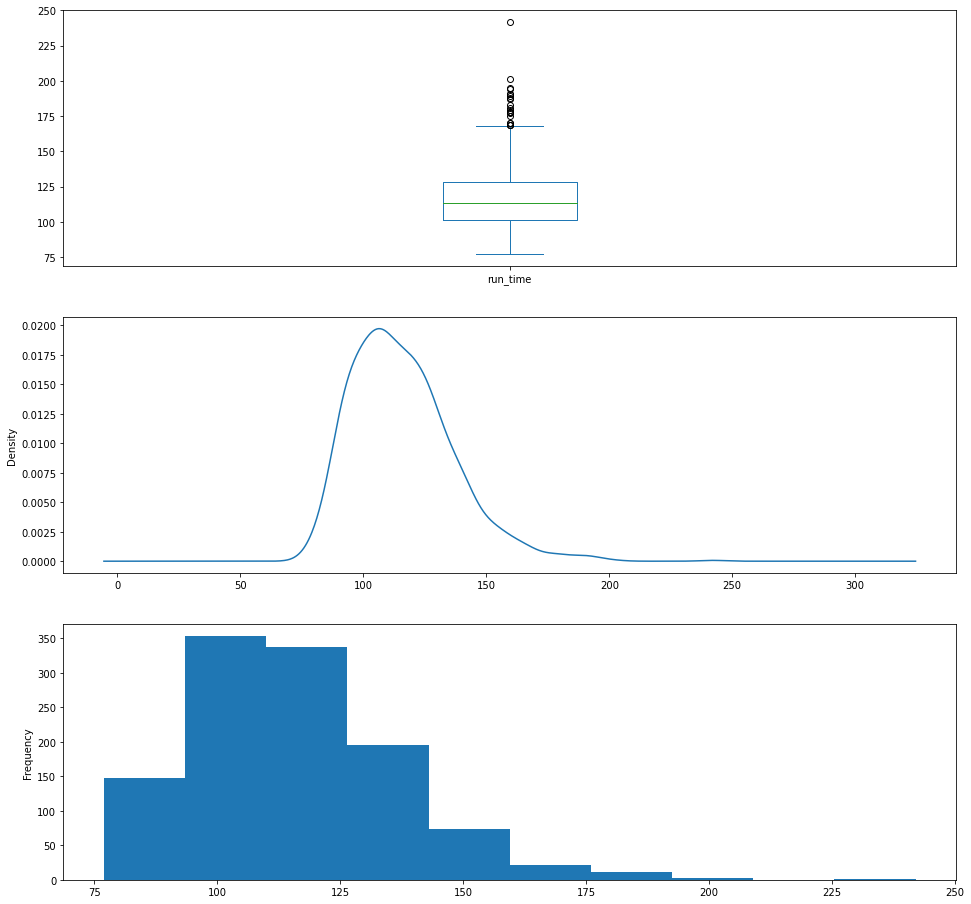

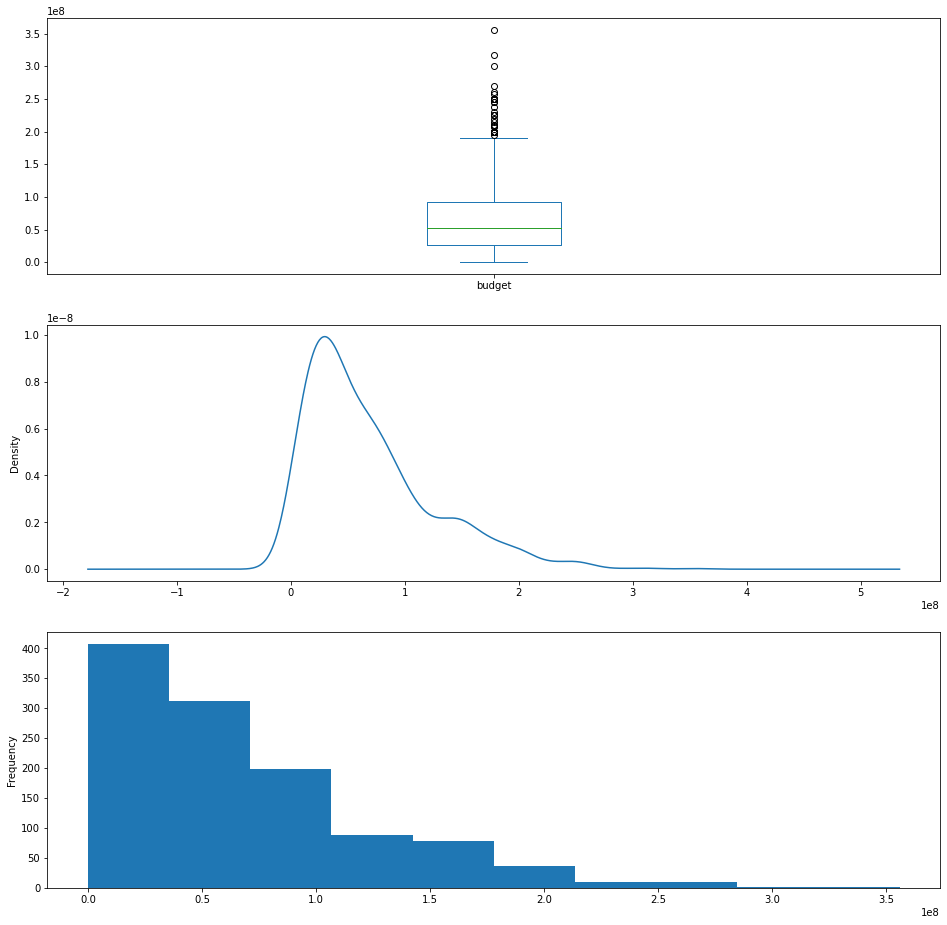

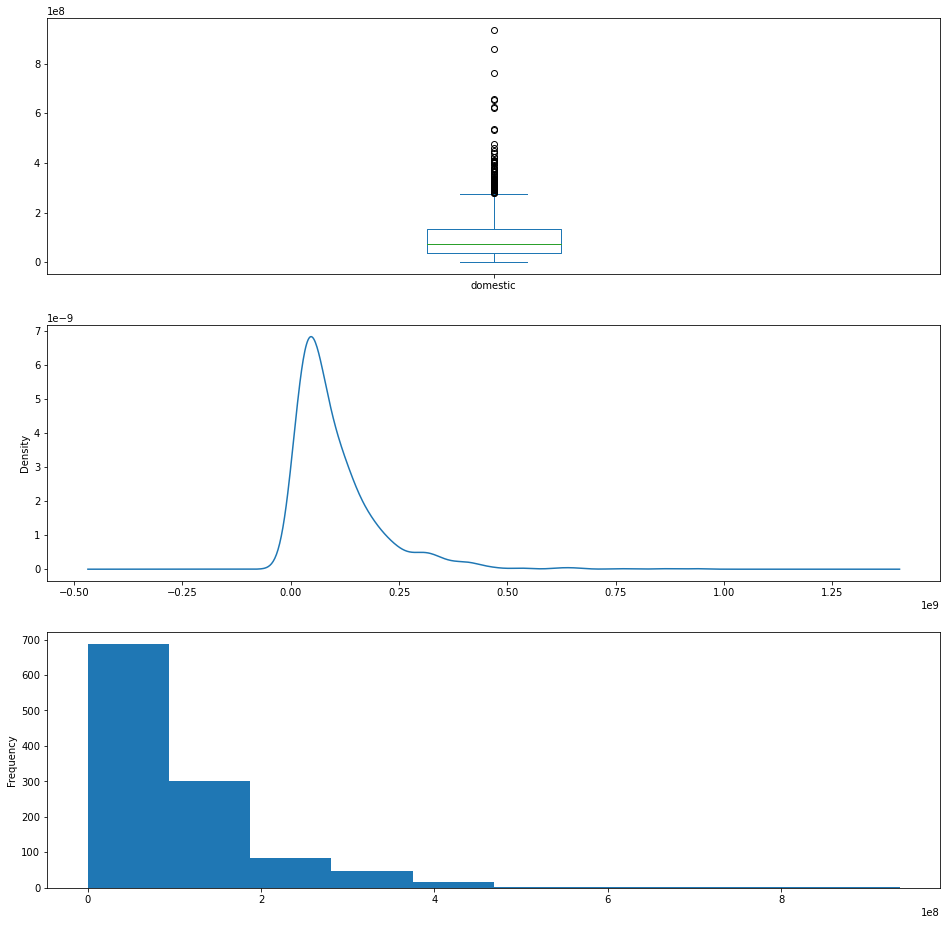

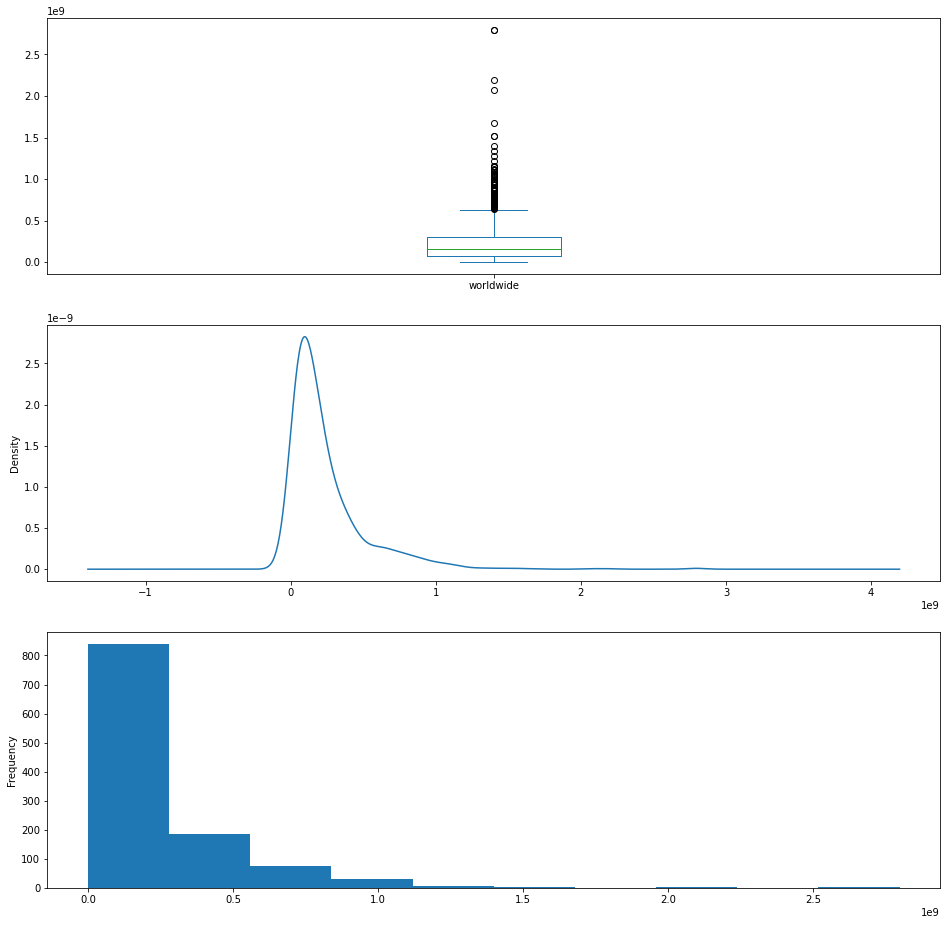

In [9]:
for col in movies_df.columns:
    visualize_srs(movies_df[col])

# Merge data sets

In [ ]:
ratings_df = pd.read_csv("data_rating.csv")
ratings_df

,user_id,movie_id,rating
0,u00001,m0004,4.0
1,u00001,m0011,3.5
2,u00001,m0024,2.0
3,u00001,m0033,4.0
4,u00001,m0048,4.0
...,...,...,...
3363768,u10249,m1138,3.0
3363769,u10249,m1139,2.5
3363770,u10249,m1140,3.0
3363771,u10249,m1141,3.5


In [4]:
# merged_df = movies_df.merge(ratings_df, right_on = "movie_id", left_on = "movie_id", how = "right")
# merged_df

,movie_id,title,year,release,trivia,mpaa,run_time,director,writer,producer,...,main_actor_4,budget,domestic,worldwide,genre_1,genre_2,genre_3,genre_4,user_id,rating
0,m0004,Terminator 2: Judgment Day,1991,1991-07-02,"A cyborg, identical to the one who failed to k...",R,137,James Cameron,James Cameron,James Cameron,...,Robert Patrick,102000000.0,205881154.0,5.208848e+08,Action,Sci-Fi,NaN,NaN,u00001,4.0
1,m0011,Alien 3,1992,1992-05-21,"After her last encounter, Ellen Ripley crash-l...",R,114,David Fincher,Dan O'Bannon,Gordon Carroll,...,Paul McGann,50000000.0,55473545.0,1.598145e+08,Action,Horror,Sci-Fi,NaN,u00001,3.5
2,m0024,Jurassic Park,1993,1993-06-10,A pragmatic paleontologist visiting an almost ...,PG-13,127,Steven Spielberg,Michael Crichton,Kathleen Kennedy,...,Richard Attenborough,63000000.0,402828120.0,1.032021e+09,Action,Adventure,Sci-Fi,Thriller,u00001,2.0
3,m0033,Schindler's List,1993,1993-12-14,"In German-occupied Poland during World War II,...",R,195,Steven Spielberg,Thomas Keneally,Branko Lustig,...,Caroline Goodall,22000000.0,96898818.0,3.222878e+08,Biography,Drama,History,NaN,u00001,4.0
4,m0048,Forrest Gump,1994,1994-07-05,"The presidencies of Kennedy and Johnson, the e...",PG-13,142,Robert Zemeckis,Winston Groom,Wendy Finerman,...,Sally Field,55000000.0,330455270.0,6.782223e+08,Drama,Romance,NaN,NaN,u00001,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363768,m1138,Star Wars: Episode VIII - The Last Jedi,2017,2017-12-12,Rey develops her newly discovered abilities wi...,PG-13,152,Rian Johnson,Rian Johnson,Ram Bergman,...,Carrie Fisher,317000000.0,620181382.0,1.332540e+09,Action,Adventure,Fantasy,Sci-Fi,u10249,3.0
3363769,m1139,Annihilation,2018,2018-02-22,"A biologist signs up for a dangerous, secret e...",R,115,Alex Garland,Alex Garland,Eli Bush,...,Benedict Wong,40000000.0,32732301.0,4.307092e+07,Adventure,Drama,Horror,Mystery,u10249,2.5
3363770,m1140,Ready Player One,2018,2018-03-27,When the creator of a virtual reality called t...,PG-13,140,Steven Spielberg,Zak Penn,Donald De Line,...,Lena Waithe,175000000.0,137690172.0,5.828902e+08,Action,Adventure,Sci-Fi,NaN,u10249,3.0
3363771,m1141,A Quiet Place,2018,2018-04-03,"In a post-apocalyptic world, a family is force...",PG-13,90,John Krasinski,Bryan Woods,Michael Bay,...,Noah Jupe,17000000.0,188024361.0,3.409394e+08,Drama,Horror,Sci-Fi,NaN,u10249,3.5


In [5]:
# merged_df.to_csv("merged_df.csv")